# Pandas 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('property_data.csv')
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [ ]:
further_city_data = pd.DataFrame({'revenue':[7000,3400],'employee_count':[2,2]},index=['New York','Barcelona'])

city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                              'capital':[1,1,0,0,0]},
                             index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])

countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])
countries

# Concat Vertikal

In [4]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [5]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"]
)

In [6]:
further_city_data

revenue  employee_count
New York      7000               2
Barcelona     3400               2

In [13]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})

In [15]:
city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})
city_data

revenue  employee_count
Amsterdam     4200             5.0
Tokyo         6500             8.0
Toronto       8000             NaN

In [16]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data

revenue  employee_count
Amsterdam     4200             5.0
Tokyo         6500             8.0
Toronto       8000             NaN
New York      7000             2.0
Barcelona     3400             2.0

In [18]:
city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                              'capital':[1,1,0,0,0]},
                             index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])
city_countries

country  capital
Amsterdam  Holland        1
Tokyo        Japan        1
Rotterdam  Holland        0
Toronto     Canada        0
Barcelona    Spain        0

In [22]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)
cities

revenue  employee_count  country  capital
Amsterdam   4200.0             5.0  Holland      1.0
Tokyo       6500.0             8.0    Japan      1.0
Toronto     8000.0             NaN   Canada      0.0
New York    7000.0             2.0      NaN      NaN
Barcelona   3400.0             2.0    Spain      0.0
Rotterdam      NaN             NaN  Holland      0.0

In [23]:
cities = pd.concat([all_city_data, city_countries], axis=1, join='inner')
cities

# inner join : hanya diambil index yg sama
# alter join :  diambil semua meskipun nan
# left join : indexnya mengikuti tabel yg kiri
# rigth join : indexnya mengikuti tabel yg kanan

revenue  employee_count  country  capital
Amsterdam     4200             5.0  Holland        1
Tokyo         6500             8.0    Japan        1
Toronto       8000             NaN   Canada        0
Barcelona     3400             2.0    Spain        0

In [20]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])
countries

population_mil      continent
Holland              17         Europe
Japan               127           Asia
Canada               37  North America

In [32]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])
countries2

population_mil      continent
Holland              17         Europe
Japan               127           Asia
Canada               37  North America

In [33]:
pd.merge(cities, countries,  left_on='country', right_index=True)

revenue  employee_count  country  capital  population_mil  \
Amsterdam     4200             5.0  Holland        1              17   
Tokyo         6500             8.0    Japan        1             127   
Toronto       8000             NaN   Canada        0              37   

               continent  
Amsterdam         Europe  
Tokyo               Asia  
Toronto    North America

In [43]:
pd.merge(cities, countries, left_on="country", right_index=True, how='left')

revenue  employee_count  country  capital  population_mil  \
Amsterdam     4200             5.0  Holland        1            17.0   
Tokyo         6500             8.0    Japan        1           127.0   
Toronto       8000             NaN   Canada        0            37.0   
Barcelona     3400             2.0    Spain        0             NaN   

               continent  
Amsterdam         Europe  
Tokyo               Asia  
Toronto    North America  
Barcelona            NaN

In [41]:
df = pd.read_csv('property_data.csv')
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [44]:
df.isnull()

PID  ST_NUM  ST_NAME  OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0  False   False    False         False         False     False  False
1  False   False    False         False         False     False  False
2  False    True    False         False          True     False  False
3  False   False    False         False         False      True  False
4   True   False    False         False         False     False  False
5  False   False    False         False          True     False  False
6  False    True    False          True         False     False  False
7  False   False    False         False         False     False   True
8  False   False    False         False         False     False  False

In [46]:
df['ST_NUM'].fillna(0)

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [47]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [48]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [49]:
missing_values = ['--', 'na', 'n/a']
df2 = pd.read_csv('property_data.csv', na_values=missing_values)
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [50]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [51]:
df.head(9)

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY          NaN            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [54]:
cnt = 6
df.loc[cnt, 'OWN_OCCUPIED']

nan

In [56]:
df.loc[df['ST_NUM']>200, 'ST_NAME'] = '200 ST'
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0      200 ST          NaN            1      NaN   700
4          NaN   203.0      200 ST            Y            3        2  1600
5  100006000.0   207.0      200 ST            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0      200 ST            Y           --        1   NaN
8  100009000.0   215.0      200 ST            Y           na        2  1800

In [63]:
cnt=0
for row in df2['OWN_OCCUPIED']:
    try:
        int(row)
        df2.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [64]:
df2.head()

PID  ST_NUM    ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0     PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0  LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN  LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0   BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0   BERKELEY            Y           3.0        2  1600.0

In [68]:
# untuk pengecekan jumlah null setiap kolom
df2.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [65]:
# Untuk pengecekan jumlah null pada seluruh kolom 
df2.isna().sum().sum()

12

In [67]:
# pengecekan apakah ada null di dalam data frame
df2.isna().values.any()

True

# Filling NULL with median/mean

In [69]:
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [70]:
df2['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [79]:
df2['NUM_BEDROOMS'].fillna(df2['NUM_BEDROOMS'].median(), inplace=True)
# inplace true -> agar menjadi nilai permanen

df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     3.0
2  100003000.0     3.0   LEXINGTON            N           3.0        1   850.0
3  100004000.0   201.0    BERKELEY          3.0           1.0      3.0   700.0
4          3.0   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           3.0        1   800.0
6  100007000.0     3.0  WASHINGTON          3.0           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           3.0        1     3.0
8  100009000.0   215.0     TREMONT            Y           3.0        2  1800.0

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     3.0
2  100003000.0     3.0   LEXINGTON            N           3.0        1   850.0
3  100004000.0   201.0    BERKELEY          3.0           1.0      3.0   700.0
4          3.0   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           3.0        1   800.0
6  100007000.0     3.0  WASHINGTON          3.0           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           3.0        1     3.0
8  100009000.0   215.0     TREMONT            Y           3.0        2  1800.0

In [80]:
df3 = pd.read_csv('property_data.csv')
df3

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [81]:
missing_values = ['--', 'na', 'n/a']
df3 = pd.read_csv('property_data.csv', na_values=missing_values)
df3

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [82]:
df3['SQ_FT'].fillna(df3['SQ_FT'].mean(), inplace=True)
df3

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5  1100.0
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1  1100.0
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [83]:
data = pd.ExcelFile('obes.xls')
data

In [95]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [96]:
data_age.head()

Unnamed: 0   Total  Under 16  16-24  25-34  35-44  45-54  55-64  65-74  \
0        NaN     NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    2002/03  1275.0     400.0   65.0  136.0  289.0  216.0   94.0   52.0   
2    2003/04  1711.0     579.0   67.0  174.0  391.0  273.0  151.0   52.0   
3    2004/05  2035.0     547.0  107.0  287.0  487.0  364.0  174.0   36.0   
4    2005/06  2564.0     583.0   96.0  341.0  637.0  554.0  258.0   72.0   

   75 and over  
0          NaN  
1         23.0  
2         24.0  
3         32.0  
4         20.0

In [97]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [98]:
data_age.dropna(inplace=True)

In [99]:
data_age.set_index('Year', inplace=True)

In [100]:
data_age.head()

Total  Under 16  16-24  25-34   35-44  45-54  55-64  65-74  \
Year                                                                   
2002/03  1275.0     400.0   65.0  136.0   289.0  216.0   94.0   52.0   
2003/04  1711.0     579.0   67.0  174.0   391.0  273.0  151.0   52.0   
2004/05  2035.0     547.0  107.0  287.0   487.0  364.0  174.0   36.0   
2005/06  2564.0     583.0   96.0  341.0   637.0  554.0  258.0   72.0   
2006/07  3862.0     656.0  184.0  461.0  1069.0  872.0  459.0  118.0   

         75 and over  
Year                  
2002/03         23.0  
2003/04         24.0  
2004/05         32.0  
2005/06         20.0  
2006/07         43.0

<AxesSubplot:xlabel='Year'>

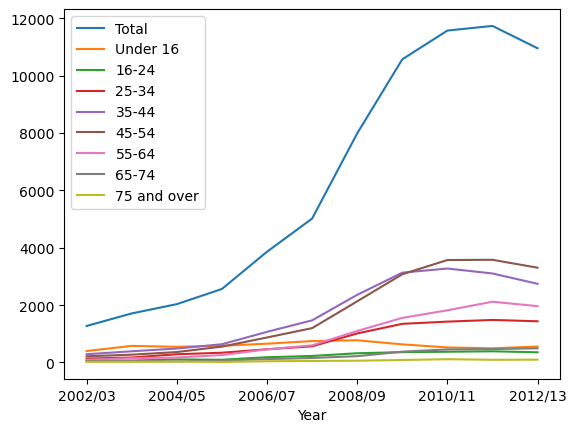

In [102]:
data_age.plot()

In [105]:
data_age_minus_total = data_age.drop('Total', axis=1)
data_age_minus_total 

Under 16  16-24   25-34   35-44   45-54   55-64  65-74  75 and over
Year                                                                        
2002/03     400.0   65.0   136.0   289.0   216.0    94.0   52.0         23.0
2003/04     579.0   67.0   174.0   391.0   273.0   151.0   52.0         24.0
2004/05     547.0  107.0   287.0   487.0   364.0   174.0   36.0         32.0
2005/06     583.0   96.0   341.0   637.0   554.0   258.0   72.0         20.0
2006/07     656.0  184.0   461.0  1069.0   872.0   459.0  118.0         43.0
2007/08     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0         53.0
2008/09     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0         63.0
2009/10     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0         87.0
2010/11     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0        115.0
2011/12     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0         94.0
2012/13     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0         99.0

<AxesSubplot:xlabel='Year'>

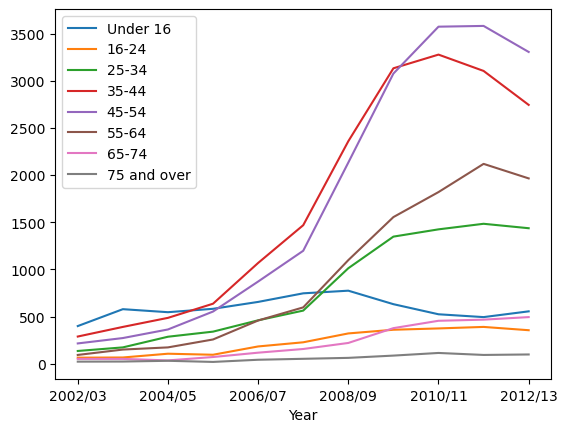

In [119]:
data_age_minus_total.plot()

<AxesSubplot:xlabel='Year'>

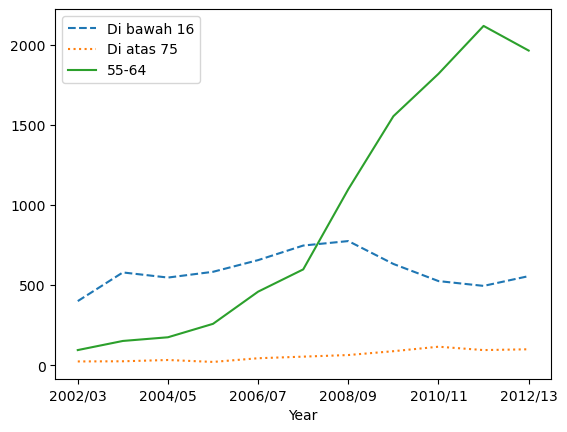

In [118]:
data_age['Under 16'].plot(linestyle= '--', label='Di bawah 16', legend=True)
data_age['75 and over'].plot(linestyle= 'dotted', label='Di atas 75', legend=True)
data_age['55-64'].plot(linestyle= '-', label='55-64', legend=True)

# Datetime/ Time series

In [121]:
from datetime import datetime

In [122]:
date_range = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_range

# freq = 'H' --> frekuensinya per hari

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [132]:
df = pd.DataFrame(date_range, columns=['date'])

In [133]:
df['data'] = np.random.randint(0, 100, size=(len(date_range)))

In [134]:
df.head()

date  data
0 2020-01-01 00:00:00    67
1 2020-01-01 01:00:00    85
2 2020-01-01 02:00:00     8
3 2020-01-01 03:00:00    30
4 2020-01-01 04:00:00    15

In [135]:
df.set_index('date', inplace=True)
df

data
date                     
2020-01-01 00:00:00    67
2020-01-01 01:00:00    85
2020-01-01 02:00:00     8
2020-01-01 03:00:00    30
2020-01-01 04:00:00    15
...                   ...
2020-01-07 20:00:00    79
2020-01-07 21:00:00    63
2020-01-07 22:00:00    13
2020-01-07 23:00:00    64
2020-01-08 00:00:00    57

[169 rows x 1 columns]

In [139]:
string_date_range_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']
# datetime.strptime('June-01-2020', '%B-%d-%Y')

# list comprehension
print([x+'HAHA' for x in string_date_range_2])
timestamp_date_range_2 = [datetime.strptime('June-01-2020', '%B-%d-%Y') for x in string_date_range_2]

timestamp_date_range_2

['June-01-2020HAHA', 'June-02-2020HAHA', 'June-03-2020HAHA']


[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0)]

In [137]:
datetime.strptime('June-01-2020', '%B-%d-%Y')

datetime.datetime(2020, 6, 1, 0, 0)

In [140]:
df

data
date                     
2020-01-01 00:00:00    67
2020-01-01 01:00:00    85
2020-01-01 02:00:00     8
2020-01-01 03:00:00    30
2020-01-01 04:00:00    15
...                   ...
2020-01-07 20:00:00    79
2020-01-07 21:00:00    63
2020-01-07 22:00:00    13
2020-01-07 23:00:00    64
2020-01-08 00:00:00    57

[169 rows x 1 columns]

In [142]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='date', length=169, freq=None)

In [146]:
df[df.index.day==6]

data
date                     
2020-01-06 00:00:00    68
2020-01-06 01:00:00    30
2020-01-06 02:00:00    10
2020-01-06 03:00:00    88
2020-01-06 04:00:00    51
2020-01-06 05:00:00    13
2020-01-06 06:00:00    57
2020-01-06 07:00:00    53
2020-01-06 08:00:00    64
2020-01-06 09:00:00    20
2020-01-06 10:00:00    35
2020-01-06 11:00:00    65
2020-01-06 12:00:00    76
2020-01-06 13:00:00    50
2020-01-06 14:00:00     2
2020-01-06 15:00:00    33
2020-01-06 16:00:00    90
2020-01-06 17:00:00    50
2020-01-06 18:00:00    97
2020-01-06 19:00:00     5
2020-01-06 20:00:00    22
2020-01-06 21:00:00    62
2020-01-06 22:00:00     3
2020-01-06 23:00:00    30

In [148]:
df.loc['2020-01-01':'2020-01-02']

data
date                     
2020-01-01 00:00:00    67
2020-01-01 01:00:00    85
2020-01-01 02:00:00     8
2020-01-01 03:00:00    30
2020-01-01 04:00:00    15
2020-01-01 05:00:00    72
2020-01-01 06:00:00    81
2020-01-01 07:00:00    37
2020-01-01 08:00:00    32
2020-01-01 09:00:00     2
2020-01-01 10:00:00    24
2020-01-01 11:00:00    24
2020-01-01 12:00:00    34
2020-01-01 13:00:00    57
2020-01-01 14:00:00    81
2020-01-01 15:00:00    13
2020-01-01 16:00:00    80
2020-01-01 17:00:00     8
2020-01-01 18:00:00    53
2020-01-01 19:00:00     4
2020-01-01 20:00:00    60
2020-01-01 21:00:00    81
2020-01-01 22:00:00    18
2020-01-01 23:00:00    37
2020-01-02 00:00:00     7
2020-01-02 01:00:00    34
2020-01-02 02:00:00    88
2020-01-02 03:00:00    52
2020-01-02 04:00:00    26
2020-01-02 05:00:00    91
2020-01-02 06:00:00    83
2020-01-02 07:00:00    83
2020-01-02 08:00:00    72
2020-01-02 09:00:00    58
2020-01-02 10:00:00     9
2020-01-02 11:00:00    37
2020-01-02 12:00:00    56
2020-01-02 13:00:00    84
2020-01-02 14:00:00    80
2020-01-02 15:00:00    36
2020-01-02 16:00:00    85
2020-01-02 17:00:00    86
2020-01-02 18:00:00    59
2020-01-02 19:00:00    36
2020-01-02 20:00:00    91
2020-01-02 21:00:00    86
2020-01-02 22:00:00    13
2020-01-02 23:00:00    54

In [150]:
df.loc['2020-01-01']

data
date                     
2020-01-01 00:00:00    67
2020-01-01 01:00:00    85
2020-01-01 02:00:00     8
2020-01-01 03:00:00    30
2020-01-01 04:00:00    15
2020-01-01 05:00:00    72
2020-01-01 06:00:00    81
2020-01-01 07:00:00    37
2020-01-01 08:00:00    32
2020-01-01 09:00:00     2
2020-01-01 10:00:00    24
2020-01-01 11:00:00    24
2020-01-01 12:00:00    34
2020-01-01 13:00:00    57
2020-01-01 14:00:00    81
2020-01-01 15:00:00    13
2020-01-01 16:00:00    80
2020-01-01 17:00:00     8
2020-01-01 18:00:00    53
2020-01-01 19:00:00     4
2020-01-01 20:00:00    60
2020-01-01 21:00:00    81
2020-01-01 22:00:00    18
2020-01-01 23:00:00    37

In [151]:
df.resample('D').mean()

data
date                 
2020-01-01  41.791667
2020-01-02  58.583333
2020-01-03  44.625000
2020-01-04  49.583333
2020-01-05  45.250000
2020-01-06  44.750000
2020-01-07  53.500000
2020-01-08  57.000000

In [152]:
df['rolling_sum'] = df.rolling(3).sum()

In [153]:
df.head()

data  rolling_sum
date                                  
2020-01-01 00:00:00    67          NaN
2020-01-01 01:00:00    85          NaN
2020-01-01 02:00:00     8        160.0
2020-01-01 03:00:00    30        123.0
2020-01-01 04:00:00    15         53.0

In [154]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')


In [155]:
df.head()

data  rolling_sum  rolling_sum_backfilled
date                                                          
2020-01-01 00:00:00    67          NaN                   160.0
2020-01-01 01:00:00    85          NaN                   160.0
2020-01-01 02:00:00     8        160.0                   160.0
2020-01-01 03:00:00    30        123.0                   123.0
2020-01-01 04:00:00    15         53.0                    53.0

In [250]:
df4 = pd.read_csv('property_data.csv')
df4

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [251]:
cnt=0
for row in df4['NUM_BATH']:
    try:
        float(row)
        pass
    except ValueError:
        df4.loc[cnt, 'NUM_BATH']=np.nan
    cnt+=1
df4

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2      NaN   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [252]:
df4['NUM_BATH'].fillna(df4['NUM_BATH'].median(), inplace=True)
df4

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      1.0   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2      1.0   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [189]:
df4['NUM_BATH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9 entries, 0 to 8
Series name: NUM_BATH
Non-Null Count  Dtype 
--------------  ----- 
1 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes
